<a href="https://colab.research.google.com/github/thiagolopes97/Portifolio_Projetos/blob/main/Analisando_os_Dados_do_Airbnb_(Roma%2C_It%C3%A1lia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="%" src="https://images.unsplash.com/photo-1525874684015-58379d421a52?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=750&q=80">

#### **Primeiro Projeto Realizado no Data Science na Prática 2.0**
*by [Thiago Gonçalves Guimarães Lopes](https://github.com/thiagolopes97/Portifolio_Projetos)*

---

# Análise dos Dados do Airbnb - Roma, Itália

O [Airbnb](https://www.airbnb.com.br/) é um serviço digital que possibilita que pessoas do mundo inteiro ofereçam suas casas para usuários que buscam acomodações, **normalmente mais em conta** do que um hotel, em qualquer lugar do mundo. Dentro da plataforma, é possível oferecer um quarto ou a casa completa a outros usuários, mas também somente alugar um espaço.


Com essa missão de conectar as pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb no final de 2018 já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="35%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Roma, na Itália, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Neste projeto, foi utilizado somente o arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rome (good for visualisations)..*


In [71]:
# Importação das Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [72]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2020-12-17/visualisations/listings.csv")

## Análise dos Dados

A primeira etapa de qualquer projeto de Data Science, seja a criação de um modelo de Machine Learning ou apenas um análise gráfica de dados é entender o significado dos dados obtidos e como ele se organiza.

**Dicionário das variáveis**

* `id` - Número de id do imóvel
* `name` - Nome do imóvel anunciado
* `host_id` - Número de id do proprietário (anfitrião)
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Esta coluna não apresenta nenhuma informação
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Tipo de quarto que é oferecido
* `price` - Preço para alugar o imóvel
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de reviews que a propriedade possui no app
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Quantidade de dias disponíveis em um ano.

Antes de aplicar qualquer método, vamos analisar 5 entradas aleatórias do nosso dataset.

In [73]:
# Mostrando 5 entradas aleatórias do nosso conjunto de dados

df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10959,16731420,Elegant Apartament Roma Monti Coliseum❤️,110940063,Donny,NaN,I Centro Storico,41.89565,12.49177,Entire home/apt,111,2,173,2020-03-09,3.63,1,0
16073,25790739,Penthouse Ostia,7648426,Graham,NaN,X Ostia/Acilia,41.73930,12.26867,Entire home/apt,60,1,2,2020-08-22,0.06,1,365
20875,34898437,Ambrosia 3D Home,67091075,Andrea,NaN,I Centro Storico,41.91534,12.46423,Entire home/apt,75,2,24,2021-01-01,1.27,1,180
19094,32041077,Justacasa - San Pietro,220718675,Alfredo,NaN,XIII Aurelia,41.89432,12.45745,Entire home/apt,94,1,30,2020-06-11,1.52,3,355
25806,43147250,Roman Holiday apartment for 6 by Piazza Navona,343515958,Alex,NaN,I Centro Storico,41.89989,12.47140,Entire home/apt,267,3,0,NaN,NaN,1,334


### **Q1. Quantos atributos (variáveis) e quantas amostras o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Pela rápida análise acima, ja é possível perceber que tem algumas variáveis que são apenas números inteiros (*int*), o endereço (*strings*), valores numéricos decimais (*floats*) e e outras valores ausentes (*NaN*). 

Este *dataset* que baixamos é a versão "resumida" do Airbnb, normalmente utilizada apenas para uma análise visual dos dados. Há uma versão mais completa disponível com 106 variáveis (`listings.csv.gz`).

O próximo passo agora é analisar quantitativamente o nosso *dataset*.

In [74]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

Entradas:	 28151
Variáveis:	 16



In [75]:
# Definir quais são as variáveis e seus tipos dentro do Dataset
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Quantos valores nulos ou formatados de maneira incorreta estão presentes no *dataset*? Limpeza e manipulação do dataset**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos ou totalmente inúteis comparados ao total de entradas.

Do caso do nosso *dataset*, têm-se que:
* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 23% dos dados.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [76]:
# Porcentagem de valores ausentes no dataset
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.226706
last_review                       0.226706
host_name                         0.000391
name                              0.000249
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Primeiro vamos analisar as variáveis numéricas relevantes para nossa análise.

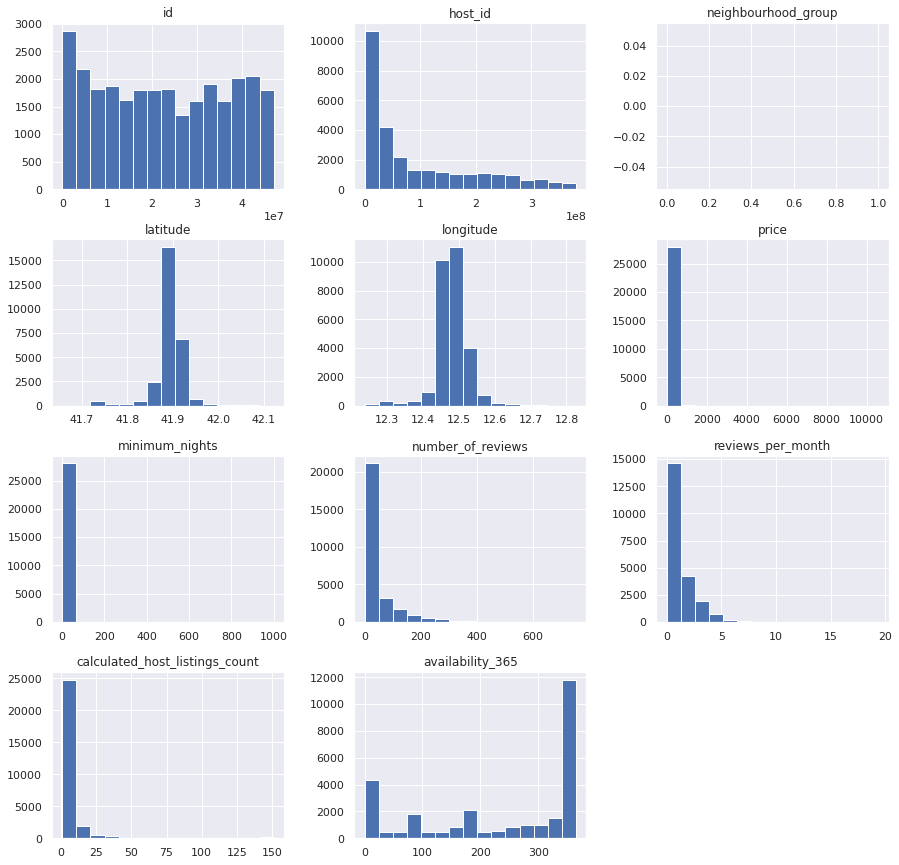

In [90]:
# Plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,15));

Essa visualização primária nos permite ter uma noção geral dos dados mas não a sua completude. Mas por que? 

Isso ocorre devido a presença de *Outliers*, que são valores muito maiores que tendem a não seguir o padrão dos dados. Mais para frente iremos analisar esses valores sem os *outliers*.

Agora, vamos avaliar algumas variáveis categóricas.

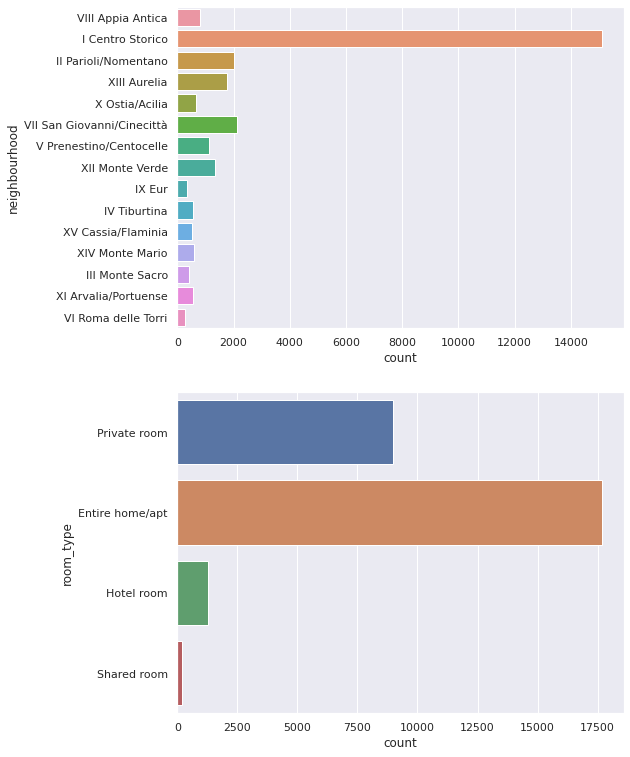

In [98]:
plt.figure(figsize=(8,13))
sns.set(font_scale=1.0)

plt.subplot(2,1,1)
sns.countplot(y='neighbourhood',data=df)

plt.subplot(2,1,2)
sns.countplot(y='room_type',data=df);

Como pode-se ver acima, a grande maioria dos imóveis oferecidos no Airbnb em Roma estão localizados no *I Centro Storico* sendo mais comum as pessoas oferecerem um quarto privado (*Private Room*) ou todo o imóvel (*Entire home/ apt*).

Agora vamos remover os *outlier* para podermos analisar melhor os outros dados.

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [78]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,28151.000000,28151.000000,28151.000000,21769.000000,28151.000000,28151.000000
mean,108.706760,3.361834,40.817591,1.149521,6.597172,234.941174
std,322.280649,15.989722,69.634285,1.278964,16.343341,138.716651
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,48.000000,1.000000,1.000000,0.190000,1.000000,92.000000
50%,70.000000,2.000000,9.000000,0.670000,2.000000,295.000000
75%,104.000000,3.000000,51.000000,1.710000,5.000000,363.000000
max,10571.000000,1000.000000,753.000000,19.330000,151.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 632, porém seu valor máximo é 131727.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights


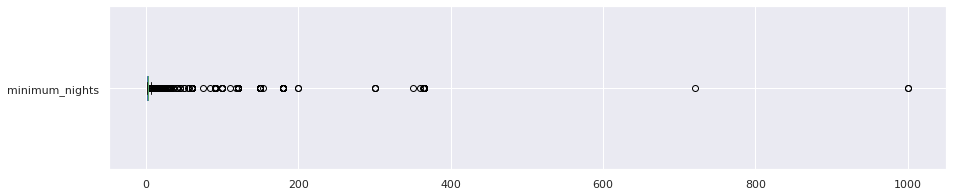

minimum_nights: valores acima de 30:
191 entradas
0.6785%


In [79]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

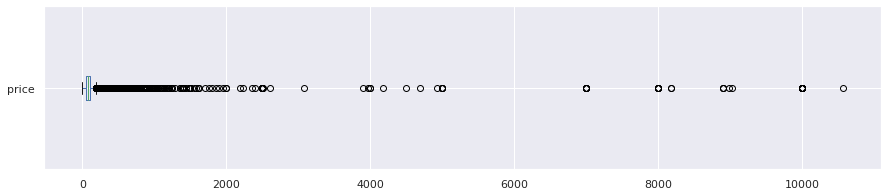


price: valores acima de 1500
68 entradas
0.2416%


In [80]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

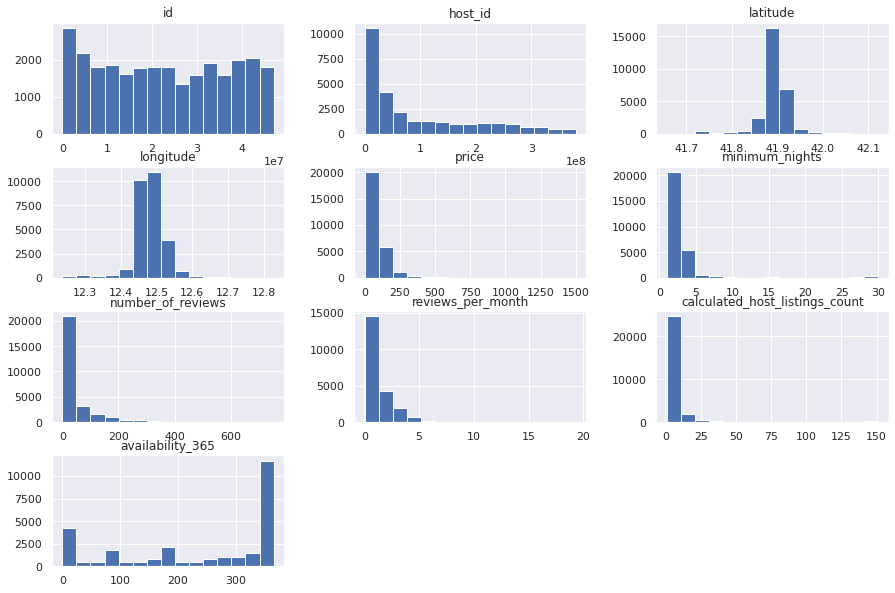

In [81]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [82]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.012789,-0.068049,-0.071453,0.082962,0.044445
minimum_nights,-0.012789,1.000000,-0.032480,-0.057172,-0.025688,-0.029357
number_of_reviews,-0.068049,-0.032480,1.000000,0.839571,-0.049621,0.026041
reviews_per_month,-0.071453,-0.057172,0.839571,1.000000,-0.032677,0.015574
calculated_host_listings_count,0.082962,-0.025688,-0.049621,-0.032677,1.000000,-0.041222
availability_365,0.044445,-0.029357,0.026041,0.015574,-0.041222,1.000000


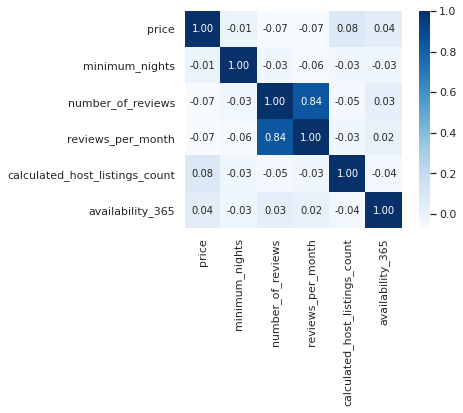

In [83]:
sns.heatmap(corr, cmap='Blues', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [84]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    17570
Private room        8841
Hotel room          1289
Shared room          192
Name: room_type, dtype: int64

In [85]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.629930
Private room       0.316973
Hotel room         0.046214
Shared room        0.006884
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [86]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
I Centro Storico              113.432310
XV Cassia/Flaminia             95.922772
XIII Aurelia                   87.496249
IX Eur                         87.357771
II Parioli/Nomentano           84.157625
XII Monte Verde                79.452858
XIV Monte Mario                77.295848
X Ostia/Acilia                 73.931571
VII San Giovanni/Cinecittà     70.881935
VIII Appia Antica              67.958801
Name: price, dtype: float64

Acima, vemos que bairros como Vaz Lobo, Engenheiro Albuquerque e Paciência, estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Vaz Lobo.

In [87]:
# ver quantidade de imóveis no Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

# ver as 3 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == "Vaz Lobo"]

(0, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

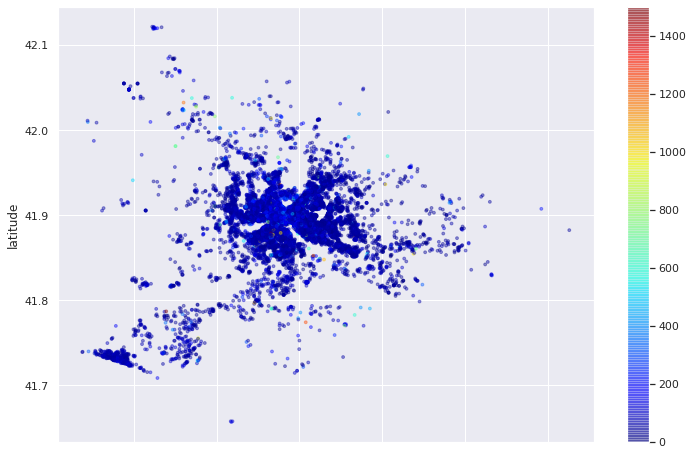

In [88]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.